# Chapter 12: Bootstrapping

### Plot the 95% Confidence Interval for the Mean

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Original dataset
data = np.array([82, 76, 90, 85, 50, 32, 78, 90, 99, 100, 20, 88])

# Number of bootstrap samples
n_bootstrap = 1000
bootstrap_means = []
bootstrap_medians = []
bootstrap_var = []

# Bootstrap sampling
for _ in range(n_bootstrap):
    sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(sample))
    bootstrap_medians.append(np.median(sample))
    bootstrap_var.append(np.var(sample, ddof=1))  # Sample variance

# Calculate 95\% confidence interval for the mean
mean_lower_bound = np.percentile(bootstrap_means, 2.5)
mean_upper_bound = np.percentile(bootstrap_means, 97.5)

# Calculate 95\% confidence interval for the median
median_lower_bound = np.percentile(bootstrap_medians, 2.5)
median_upper_bound = np.percentile(bootstrap_medians, 97.5)

# Calculate 95\% confidence interval for the variance
var_lower_bound = np.percentile(bootstrap_var, 2.5)
var_upper_bound = np.percentile(bootstrap_var, 97.5)

95\% Confidence Interval for the Mean: (59.25, 86.92)


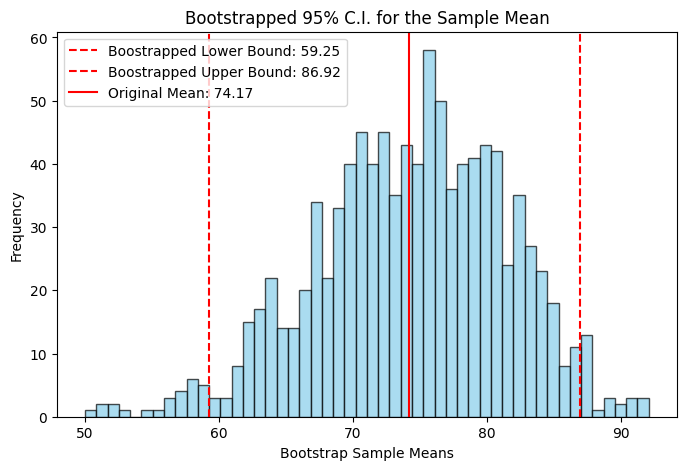

In [2]:
print(f"95\% Confidence Interval for the Mean: ({mean_lower_bound:.2f}, {mean_upper_bound:.2f})")

# Visualization
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_means, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_lower_bound, color='red', linestyle='dashed', label=f'Boostrapped Lower Bound: {mean_lower_bound:.2f}')
plt.axvline(mean_upper_bound, color='red', linestyle='dashed', label=f'Boostrapped Upper Bound: {mean_upper_bound:.2f}')
plt.axvline(np.mean(data), color='red', linestyle='solid', label=f'Original Mean: {np.mean(data):.2f}')
plt.xlabel("Bootstrap Sample Means")
plt.ylabel("Frequency")
plt.title("Bootstrapped 95% C.I. for the Sample Mean")
plt.legend()
plt.show()

### Plot the 95% Confidence Interval for the Median

95\% Confidence Interval for the Median: (63.00, 90.00)


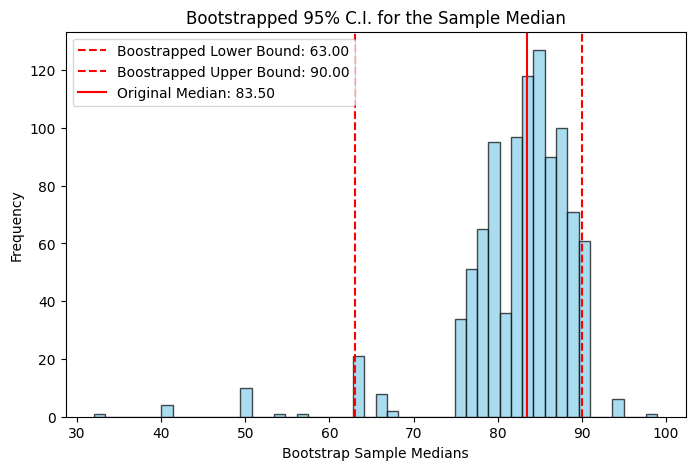

In [3]:
print(f"95\% Confidence Interval for the Median: ({median_lower_bound:.2f}, {median_upper_bound:.2f})")

# Visualization
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_medians, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(median_lower_bound, color='red', linestyle='dashed', label=f'Boostrapped Lower Bound: {median_lower_bound:.2f}')
plt.axvline(median_upper_bound, color='red', linestyle='dashed', label=f'Boostrapped Upper Bound: {median_upper_bound:.2f}')
plt.axvline(np.median(data), color='red', linestyle='solid', label=f'Original Median: {np.median(data):.2f}')
plt.xlabel("Bootstrap Sample Medians")
plt.ylabel("Frequency")
plt.title("Bootstrapped 95% C.I. for the Sample Median")
plt.legend()
plt.show()

### Plot the 95% Confidence Interval for the Variance

95\% Confidence Interval for the Variance: (81.45, 1069.01)


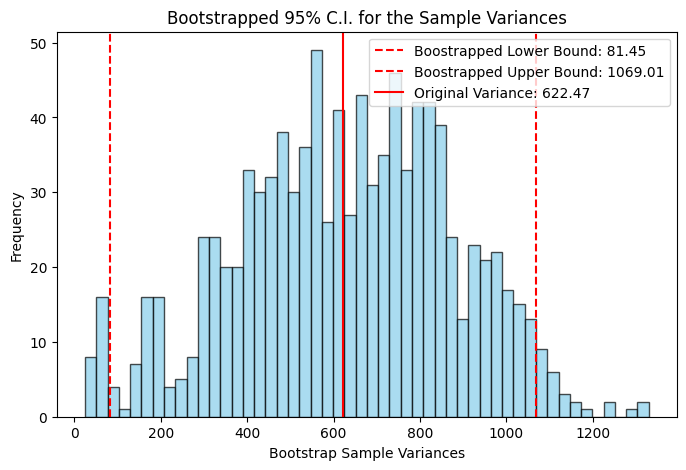

In [4]:
print(f"95\% Confidence Interval for the Variance: ({var_lower_bound:.2f}, {var_upper_bound:.2f})")

# Visualization
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_var, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(var_lower_bound, color='red', linestyle='dashed', label=f'Boostrapped Lower Bound: {var_lower_bound:.2f}')
plt.axvline(var_upper_bound, color='red', linestyle='dashed', label=f'Boostrapped Upper Bound: {var_upper_bound:.2f}')
plt.axvline(np.var(data), color='red', linestyle='solid', label=f'Original Variance: {np.var(data):.2f}')
plt.xlabel("Bootstrap Sample Variances")
plt.ylabel("Frequency")
plt.title("Bootstrapped 95% C.I. for the Sample Variances")
plt.legend()
plt.show()

## Bootrap the linear regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
np.random.seed(42)  # for reproducibility

# Data
X = np.array([850, 900, 1200, 1500, 1700, 1850, 2000, 2100, 2300, 2500]).reshape(-1, 1)
y = np.array([125, 130, 155, 180, 195, 205, 220, 230, 245, 260])

# Original model
model = LinearRegression().fit(X, y)
original_slope = model.coef_[0]
original_intercept = model.intercept_

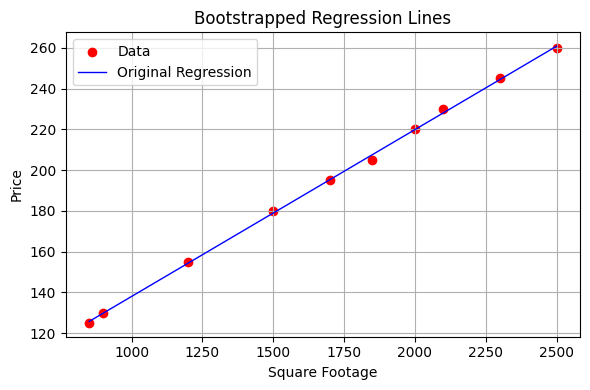

In [6]:
# Plot the regression line
plt.figure(figsize=(6, 4))
# Scatter original data
plt.scatter(X, y, color='red', label='Data')
# Plot the original regression line
import numpy as np
x_range = Ｘ
plt.plot(x_range, model.predict(x_range), color='blue', label='Original Regression', linewidth=1)
# Set labels and title
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Bootstrapped Regression Lines")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Bootstrapped regression

In [7]:
# Bootstrap
n_iterations = 10000
slopes = []
intercepts = []
predictions = []

for _ in range(n_iterations):
    indices = np.random.choice(len(X), size=len(X), replace=True)
    X_sample = X[indices]
    y_sample = y[indices]
    
    model_sample = LinearRegression().fit(X_sample, y_sample)
    
    slopes.append(model_sample.coef_[0])
    intercepts.append(model_sample.intercept_)
    predictions.append(model_sample.predict([[1800]])[0])

slopes = np.array(slopes)
intercepts = np.array(intercepts)
predictions = np.array(predictions)

# Confidence intervals
def ci(data):
    return np.percentile(data, [2.5, 97.5])

slope_ci = ci(slopes)
intercept_ci = ci(intercepts)
prediction_ci = ci(predictions)

print(f"95% CI for slope: {slope_ci}")
print(f"95% CI for intercept: {intercept_ci}")
print(f"95% CI for predicted price (1800 sqft): {prediction_ci}")

95% CI for slope: [0.08071252 0.08303095]
95% CI for intercept: [54.47088839 58.04878223]
95% CI for predicted price (1800 sqft): [202.59131706 204.32525365]


### Visualize the regression

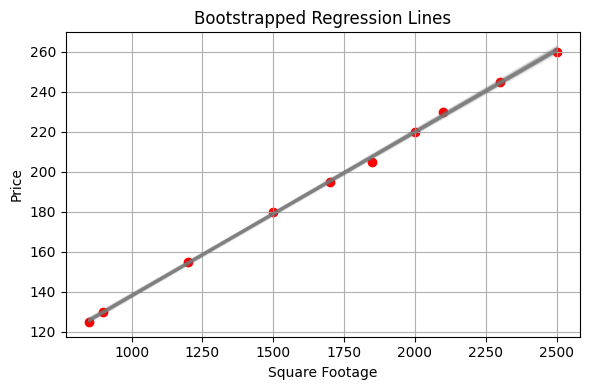

In [8]:
plt.figure(figsize=(6, 4))
# Generate predicted lines for visualization
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
lines = []
for i in range(100):  # Limit to 100 lines for readability
    y_pred = slopes[i] * x_range + intercepts[i]
    lines.append((x_range, y_pred))
# Scatter original data
plt.scatter(X, y, color='red', label='Data')
# Plot all bootstrapped regression lines
for x_vals, y_vals in lines:
    plt.plot(x_vals, y_vals, color='gray', alpha=0.05)
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Bootstrapped Regression Lines")
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualize the confidence interval for the slope

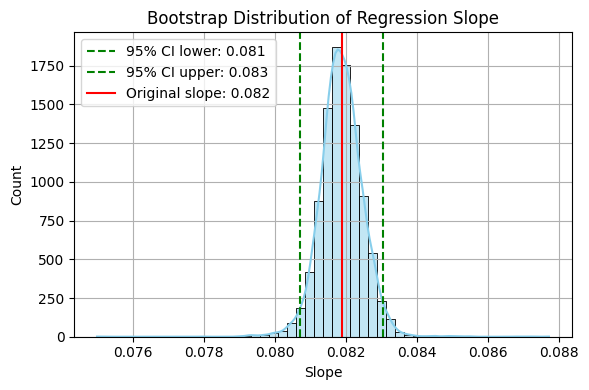

In [9]:
# Visualize the confidence interval with one graph
plt.figure(figsize=(6, 4))
sns.histplot(slopes, bins=50, kde=True, color='skyblue')
plt.axvline(slope_ci[0], color='green', linestyle='--', label=f"95% CI lower: {slope_ci[0]:.3f}")
plt.axvline(slope_ci[1], color='green', linestyle='--', label=f"95% CI upper: {slope_ci[1]:.3f}")
plt.axvline(original_slope, color='red', linestyle='-', label=f"Original slope: {original_slope:.3f}")
plt.title("Bootstrap Distribution of Regression Slope")
plt.xlabel("Slope")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualize the confidence interval for the prediction

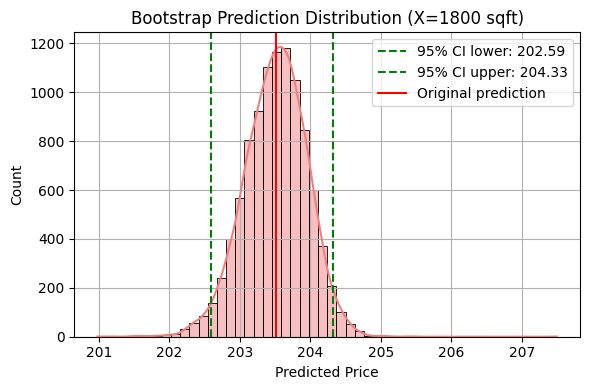

In [10]:
# Visualize the bootstrap prediction distribution in one graph
plt.figure(figsize=(6, 4))
sns.histplot(predictions, bins=50, kde=True, color='lightcoral')
plt.axvline(prediction_ci[0], color='green', linestyle='--', label=f"95% CI lower: {prediction_ci[0]:.2f}")
plt.axvline(prediction_ci[1], color='green', linestyle='--', label=f"95% CI upper: {prediction_ci[1]:.2f}")
plt.axvline(model.predict([[1800]])[0], color='red', linestyle='-', label="Original prediction")
plt.title("Bootstrap Prediction Distribution (X=1800 sqft)")
plt.xlabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()